# List of Basic Regressions

# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels import regression
from statsmodels import regression, stats
import scipy as sp
import statsmodels.api as sm
import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
start = '2018-01-01'
end = '2022-01-01'
market1 = 'SPY'
market2 = '^IXIC'
symbol1 = 'AMD'
symbol2 = 'INTC'

In [3]:
asset1 = yf.download(symbol1, start=start, end=end)['Adj Close']
asset2 = yf.download(symbol2, start=start, end=end)['Adj Close']
benchmark = yf.download(market1, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     427.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           2.13e-79
Time:                        17:27:11   Log-Likelihood:                 2125.5
No. Observations:                1007   AIC:                            -4247.
Df Residuals:                    1005   BIC:                            -4237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      2.282      0.023       0.000       0.004
x1             1.4588      0.071     20.674      0.000       1.320       1.597
==============================================================================
Omnibus:                      219.316   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1465.582
Skew:                           0.820   Prob(JB):                         0.00
Kurtosis:                       8.678   Cond. No.                         76.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

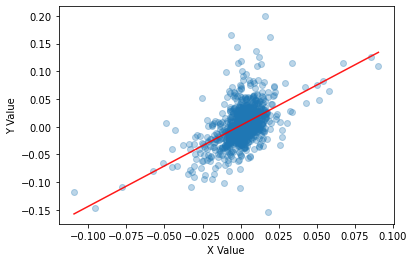

In [5]:
r_a = asset1.pct_change()[1:].dropna()
r_b = benchmark.pct_change()[1:].dropna()

linreg(r_b.values, r_a.values)

<AxesSubplot:>

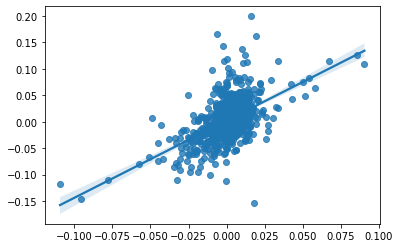

In [6]:
sns.regplot(r_b.values, r_a.values)

# Regression Model Instability

In [7]:
def linreg(X,Y):
    x = sm.add_constant(X) # Add a row of 1's so that our model has a constant term
    model = regression.linear_model.OLS(Y, x).fit()
    return model.params[0], model.params[1] # Return the coefficients of the linear model

In [8]:
breakpoint = 100
xs = np.arange(len(asset1))
xs2 = np.arange(breakpoint)
xs3 = np.arange(len(asset1) - breakpoint)

In [9]:
a, b = linreg(xs, asset1)
a2, b2 = linreg(xs2, asset1[:breakpoint])
a3, b3 = linreg(xs3, asset1[breakpoint:])

Y_hat = pd.Series(xs * b + a, index=asset1.index)
Y_hat2 = pd.Series(xs2 * b2 + a2, index=asset1.index[:breakpoint])
Y_hat3 = pd.Series(xs3 * b3 + a3, index=asset1.index[breakpoint:])

Text(0, 0.5, 'Price')

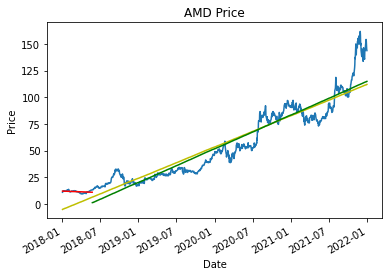

In [10]:
asset1.plot()
Y_hat.plot(color='y')
Y_hat2.plot(color='r')
Y_hat3.plot(color='g')
plt.title(symbol1 + ' Price')
plt.ylabel('Price')

In [11]:
b1 = yf.download(market1, start=start, end=end)['Adj Close']
b2 = yf.download(market2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Constant: -58.32215050221849 MLR beta to S&P 500: -0.08513423266658202  MLR beta to MDY 0.013905040520174692


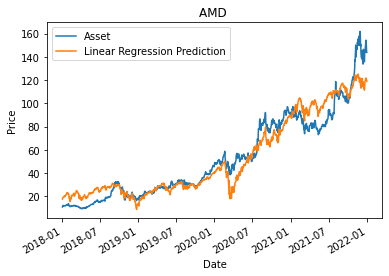

In [12]:
mlr = regression.linear_model.OLS(asset1, sm.add_constant(np.column_stack((b1, b2)))).fit()
prediction = mlr.params[0] + mlr.params[1]*b1 + mlr.params[2]*b2
print('Constant:', mlr.params[0], 'MLR beta to S&P 500:', mlr.params[1], ' MLR beta to MDY', mlr.params[2])

# Plot the asset pricing data and the regression model prediction, just for fun
asset1.plot()
prediction.plot()
plt.title(symbol1 + ' ')
plt.ylabel('Price')
plt.legend(['Asset', 'Linear Regression Prediction'])

In [13]:
# Compute Pearson correlation coefficient
sp.stats.pearsonr(b1,b2)[0] # Second return value is p-value

0.9868492914594209

# Multiple Linear Regression

In [14]:
slr = regression.linear_model.OLS(asset1, sm.add_constant(asset2)).fit()
print('SLR beta of stock2:', slr.params[1])

SLR beta of stock2: 2.6569820300692166


In [15]:
# Run multiple linear regression using asset2 and SPY as independent variables
mlr = regression.linear_model.OLS(asset1, sm.add_constant(np.column_stack((asset2, benchmark)))).fit()

prediction = mlr.params[0] + mlr.params[1]*asset2 + mlr.params[2]*benchmark
prediction.name = 'Prediction'

print('MLR beta of asset2:', mlr.params[1], '\nMLR beta of S&P 500:', mlr.params[2])

MLR beta of asset2: -0.23646687078090445 
MLR beta of S&P 500: 0.5092140705462285


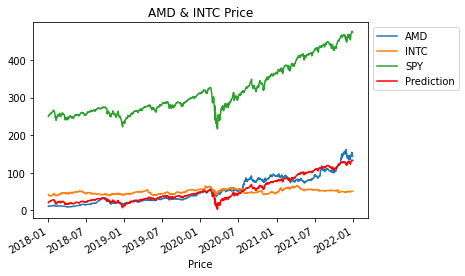

In [16]:
# Plot the three variables along with the prediction given by the MLR
asset1.plot(label=symbol1)
asset2.plot(label=symbol2)
benchmark.plot(label=market1)
prediction.plot(color='r', label='Prediction')
plt.title(symbol1 + ' & ' + symbol2 + ' Price')
plt.xlabel('Price')
plt.legend(bbox_to_anchor=(1,1), loc=2)

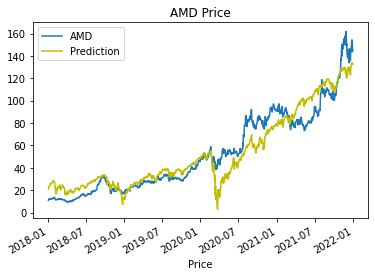

In [17]:
# Plot only the dependent variable and the prediction to get a closer look
asset1.plot(label = symbol1)
prediction.plot(color='y')
plt.xlabel('Price')
plt.title(symbol1 + ' Price')
plt.legend()

In [18]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     3735.
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:27:18   Log-Likelihood:                -3969.0
No. Observations:                1008   AIC:                             7944.
Df Residuals:                    1005   BIC:                             7959.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -96.3183      3.345    -28.796      0.000    -102.882     -89.755
x1            -0.2365      0.076     -3.097      0.002      -0.386      -0.087
x2             0.5092      0.007     76.601      0.000       0.496       0.522
==============================================================================
Omnibus:                       62.225   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.473
Skew:                           0.650   Prob(JB):                     1.83e-16
Kurtosis:                       2.814   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""